
# Double pendulum


<img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Double-Pendulum.svg" height=300>


Lagrangian equations of motion for the double pendulum:
\begin{equation}
\left( 
   \begin{matrix}
     \ddot{\theta}_1 \\ 
     \ddot{\theta}_2 
   \end{matrix} 
 \right) =
 \frac{1}{1 - \alpha_1\alpha_2}
 \left( 
   \begin{matrix} 
     f_1 - \alpha_1 f_2\\ 
    -\alpha_2 f_1 + f_2 
   \end{matrix} 
 \right),
 \end{equation}


where:
\begin{align}
    \alpha_1(\theta_1, \theta_2) 
    &= 
    \frac{l_2}{l_1} \frac{m_2}{m_1 + m_2} \cos(\theta_1 - \theta_2),
    \\
    \alpha_2(\theta_1, \theta_2) 
    &= 
    \frac{l_1}{l_2} \cos(\theta_1-\theta_2),
    \\
    f_1(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2) 
    &=
    -\frac{l_2}{l_1} \frac{m_2}{m_1+m_2} \, \dot{\theta}_2^2 \sin(\theta_1 - \theta_2)
     - \frac{g}{l_1} \sin\theta_1,
     \\
    f_2(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2) &
    =
    \frac{l_1}{l_2} \, \dot{\theta}_1^2 \sin(\theta_1-\theta_2) 
     - \frac{g}{l_2} \sin\theta_2.
\end{align}


Let $$\omega_1^2 = \frac{g}{l_1},  \quad \nu = \frac{l_1}{l_2}, \quad \omega_2^2 = \frac{g}{l_2} = \nu \omega_1^2 ,$$
$$\kappa = \frac{1}{\nu} \frac{m_2}{m_1 + m_2}.$$
Let's introduce dimensionless time $$\tau = \omega_1 t.$$


Then, $$
\frac{\mathrm{d}}{\mathrm{d}t} = \omega_1 \frac{\mathrm{d}}{\mathrm{d}\tau}, \quad
\frac{\mathrm{d}^2}{\mathrm{d}t^2} = \omega_1^2 \frac{\mathrm{d}^2}{\mathrm{d}\tau^2}.$$


We can write the equation of motion of the pendulum in the following dimensionless form:
\begin{equation}
\frac{\mathrm{d}^2}{\mathrm{d}\tau^2} \left( 
   \begin{matrix}
     \theta_1 \\ 
     \theta_2 
   \end{matrix} 
 \right) =
 \frac{1}{1 - \bar{\alpha}_1\bar{\alpha}_2}
 \left( 
   \begin{matrix} 
     \bar{f}_1 - \bar{\alpha}_1 \bar{f}_2\\ 
    -\bar{\alpha}_2 \bar{f}_1 + \bar{f}_2 
   \end{matrix} 
 \right),
 \end{equation}


where
\begin{align}
    \bar{\alpha}_1(\theta_1, \theta_2) 
    &= 
    \kappa \cos(\theta_1 - \theta_2),
    \\
    \bar{\alpha}_2(\theta_1, \theta_2) 
    &= 
    \nu \cos(\theta_1-\theta_2),
    \\
    \bar{f}_1(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2) 
    &=
    -\kappa \, \dot{\theta}_2^2 \sin(\theta_1 - \theta_2)
     - \sin\theta_1,
     \\
    \bar{f}_2(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2) &
    =
    \nu \, \dot{\theta}_1^2 \sin(\theta_1-\theta_2) 
     - \nu \sin\theta_2.
\end{align}


Here
$$\dot{\theta}_1 = \frac{\mathrm{d}\theta_1}{\mathrm{d}\tau}, \quad \dot{\theta}_2 = \frac{\mathrm{d}\theta_2}{\mathrm{d}\tau}$$


Install new packages:

In [1]:
] add OrdinaryDiffEqTsit5

   Resolving package versions...
  No Changes to `/workspaces/phys2200-lectures-anb19019/Project.toml`
  No Changes to `/workspaces/phys2200-lectures-anb19019/Manifest.toml`
Precompiling project...
    Moshi Being precompiled by another process (pid: 6762, pidfile: /home/codespace/.julia/compiled/v1.11/Moshi/AXKwX_CJdQg.ji.pidfile)
   1312.8 ms  ✓ Polyester
   2678.9 ms  ✓ Moshi
    SciMLBase Being precompiled by another process (pid: 6741, pidfile: /home/codespace/.julia/compiled/v1.11/SciMLBase/jigfq_CJdQg.ji.pidfile)
   1017.4 ms  ✓ FastBroadcast
   1360.8 ms  ✓ RecursiveArrayTools → RecursiveArrayToolsFastBroadcastExt
   9108.7 ms  ✓ SciMLBase
   2486.1 ms  ✓ SciMLBase → SciMLBasePyCallExt
   3159.5 ms  ✓ DiffEqBase
    OrdinaryDiffEqCore Being precompiled by another process (pid: 6329, pidfile: /home/codespace/.julia/compiled/v1.11/OrdinaryDiffEqCore/SoYJU_CJdQg.ji.pidfile)
   2929.4 ms  ✓ OrdinaryDiffEqCore
   1740.5 ms  ✓ OrdinaryDiffEqCore → OrdinaryDiffEqCoreEnzymeCoreExt
  13

In [2]:
] add Printf

   Resolving package versions...
    Updating `/workspaces/phys2200-lectures-anb19019/Project.toml`
  [de0858da] + Printf v1.11.0
  No Changes to `/workspaces/phys2200-lectures-anb19019/Manifest.toml`


In [3]:
] add Colors

   Resolving package versions...
    Updating `/workspaces/phys2200-lectures-anb19019/Project.toml`
  [5ae59095] + Colors v0.13.1
  No Changes to `/workspaces/phys2200-lectures-anb19019/Manifest.toml`



Load packages:

In [4]:

using PyPlot
using OrdinaryDiffEqTsit5
using Printf
using Colors

In [5]:

function doublependulum!(dudt, u, p, t)
    # unpack variables and parameters
    theta1 = u[1]
    theta2 = u[2]
    dtheta1dt = u[3]
    dtheta2dt = u[4]
    κ, ν = p
    
    sn, cs = sincos(theta1 - theta2)
    a1 = κ*cs
    a2 = ν*cs
    γ = 1/(1.0 - a1*a2)
    
    f1 = -κ*sn*dtheta2dt^2 - sin(theta1)
    f2 =  ν*(sn*dtheta1dt^2 - ν*sin(theta2))

    dudt[1] = u[3]
    dudt[2] = u[4]
    dudt[3] = γ*(f1 - a1*f2)
    dudt[4] = γ*(f2 - a2*f1)
    
    return nothing
end


doublependulum! (generic function with 1 method)


Parameters of the double pendulum

In [6]:

l1 = 1.0  # length of pendulum1
l2 = 1.0  # length of pendulum2
m1 = 1.0  # mass of pendulum1
m2 = 1.0; # mass of pendulum2

Dimensionless parameters in the equations

In [7]:

ν = l1/l2
κ = 1 / ν * m2 / (m1 + m2)
# Pack the parameters
p = (κ, ν);


Integration range and the initial conditions:

In [8]:

tspan = (0.0, 40.0)
initial = [pi, pi/100, 0.0, 0.0];


Define the ODE problem and solve it:

In [9]:

prob = ODEProblem(doublependulum!, initial, tspan, p)
sol = solve(prob, Tsit5(), abstol=1e-7, reltol=1e-7);


Recalculate the solution in equidistant points for nicer looking plots:

In [10]:

np = 2001
t = range(tspan[1], tspan[2], np)
sl = sol(t);


Extract $\theta_1$ and $\theta_2$:

In [11]:

theta1 = sl[1, :]
theta2 = sl[2, :];


Cartesian coordinates of the masses:

In [12]:

x1 =  l1 .* sin.(theta1)
y1 = -l1 .* cos.(theta1)
x2 = x1 .+ l2 .* sin.(theta2)
y2 = y1 .- l2 .* cos.(theta2);


### Animation:

In [13]:
"""
    snapshot_ft(nt, pts_disp, xl, xr, yb, yt, t, x1, y1, x2, y2)

Display the current positions (x1[nt], y1[nt]) and (x2[nt], y2(nt]), and 
the trajectories' fading tails - the most recent pts_disp points
"""
function snapshot_ft(nt, pts_disp, box, t, x1, y1, x2, y2)
    nt_start = max(1, nt-pts_disp)
    xl, xr, yb, yt = box
    axis("square")
    xlim(xl, xr)
    ylim(yb, yt)
    titl = @sprintf("Double pendulum t = %5.2f .. %5.2f",
                    t[nt_start], t[nt])
    title(titl, family="monospace")
    xlabel(L"$x$")
    ylabel(L"$y$")
    grid(true)

    # pivot
    plot(0.0, 0.0, color="black", marker="x", markersize=5.0)

    # two rods
    plot([0.0, x1[nt],x2[nt]], [0.0, y1[nt], y2[nt]], color="black")

    # mass 1
    c1 = "green"
    plot(x1[nt], y1[nt], color=c1, marker="o", markersize=5.0)
    
    # mass 2
    c2 = "blue"
    plot(x2[nt], y2[nt], color=c2, marker="o", markersize=5.0)

    # fading tail trajectory of mass 2
    c2p = parse(RGBA, c2)
    for i = nt_start:nt-1
        transp = 1.0 - ((nt-i-1)/(pts_disp-1))^2
        cc = (c2p.r, c2p.g, c2p.b, transp)
        plot([x2[i], x2[i+1]], [y2[i], y2[i+1]], color=cc, linewidth=0.5)
    end
    return nothing
end;


Specify the plotting limits:

In [14]:

axis_lim = (l1 + l2)*1.2
xl = -axis_lim
xr = -xl
yb = -axis_lim
yt = -yb
box = (xl, xr, yb, yt);


Animation parameters:

In [15]:

# Define the length of the trajectory's tail
f = 0.1                      # Fraction of displayed points
pts_disp = round(Int, f*np)  # Number of displayed points

200

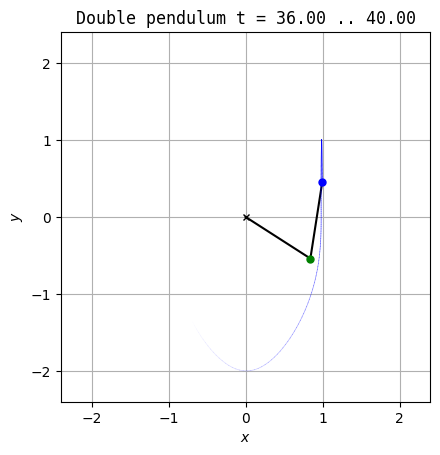

In [16]:

fig = figure()
for nt = 1:10:np
    snapshot_ft(nt, pts_disp, box, t, x1, y1, x2, y2)
    display(fig)
    IJulia.clear_output(true)
    clf()
end